In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("uber.csv")


In [ ]:
df.head(20)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
5,44470845,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2,12,2,2011,5
7,44195482,2.5,0.000000,0.000000,0.000000,0.000000,1,13,11,12,2012,1
8,15822268,9.7,-73.975187,40.745767,-74.002720,40.743537,1,9,17,2,2012,4
9,50611056,12.5,-74.001065,40.741787,-73.963040,40.775012,1,19,29,3,2012,3
10,2205147,6.5,-73.974388,40.746952,-73.988586,40.729805,1,17,22,5,2015,4


In [ ]:
df.drop(columns=['month'], inplace=True)

In [ ]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,year,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,2015,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,2009,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,2009,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,2009,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,2014,3


In [ ]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)
df['passenger_count'].fillna(df['passenger_count'].mean(),inplace=True)

<ipython-input-19-236a5a09a9ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
<ipython-input-19-236a5a09a9ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
df.head(200)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,year,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,2015,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,2009,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,2009,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,2009,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
211,34023783,4.1,-73.959427,40.774613,-73.952647,40.780213,5,16,26,2010,2
212,38970654,8.0,-73.992081,40.759209,-73.984085,40.780457,1,17,1,2015,4
213,40845743,9.5,-73.995559,40.695197,-73.974702,40.687741,1,18,21,2013,5
214,17781331,17.5,-73.974110,40.750564,-73.882380,40.755801,1,18,17,2009,1


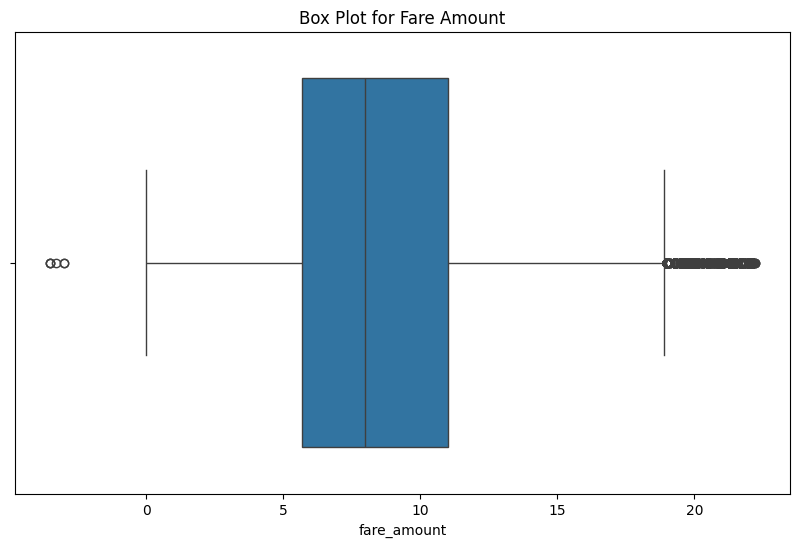

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot for Fare Amount')
plt.show()

In [ ]:
df

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,year,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,2015,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,2009,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,2009,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,2009,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199994,3189201,12.0,-73.983070,40.760770,-73.972972,40.754177,1,14,31,2014,4
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,2012,6
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,2014,4
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,2015,2


In [ ]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

In [ ]:
  rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_reg.fit(X_train, y_train)
  y_pred_rf = rf_reg.predict(X_test)

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - R2 Score: 0.019727343187448954
Linear Regression - RMSE: 4.0957886641191115

Random Forest Regression - R2 Score: 0.7515624576058113
Random Forest Regression - RMSE: 2.061924255430536


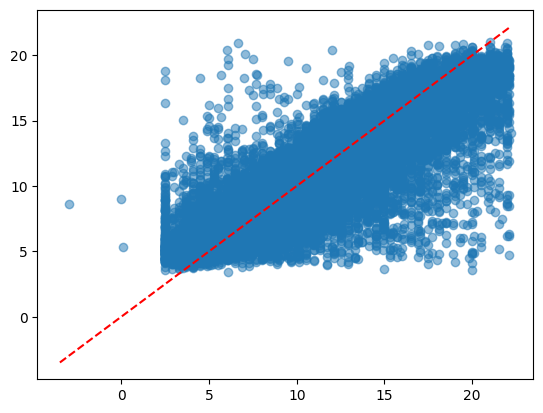

In [ ]:
print("Linear Regression - R2 Score:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)
print("\nRandom Forest Regression - R2 Score:", r2_rf)
print("Random Forest Regression - RMSE:", rmse_rf)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

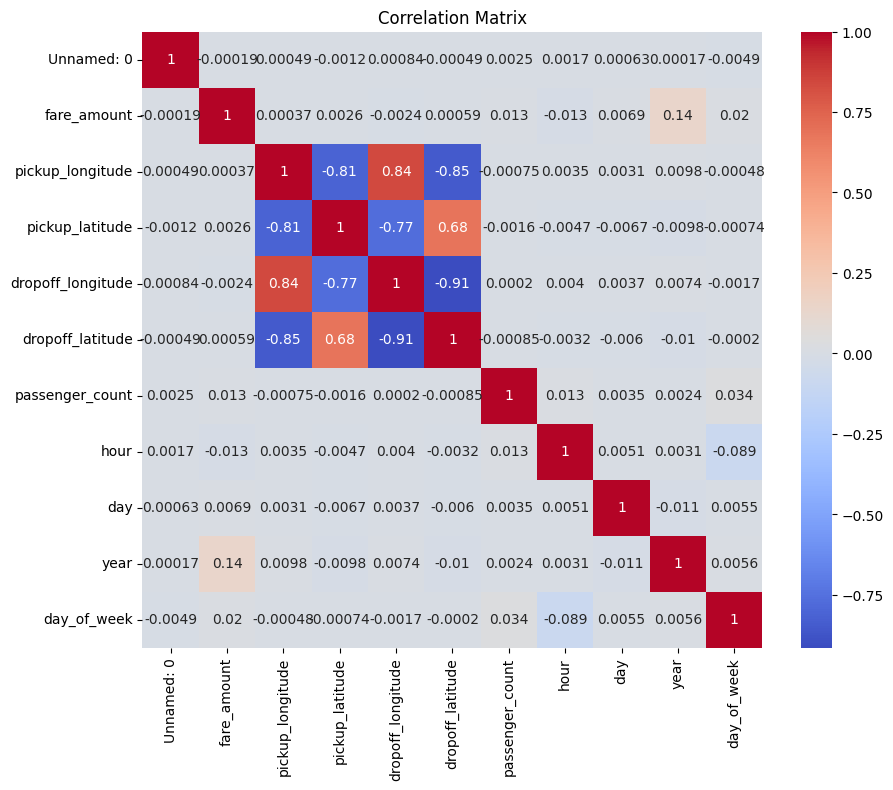

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
